In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sympy as spy
spy.init_printing()

In [2]:
rho_0, r, r_0, n, u, G = spy.symbols(r"\rho_0 r r_0 n u G", real = True, positive = True)

In [3]:
rho = rho_0 / (1 + r / r_0) ** n
M = 4 * spy.pi * rho * r ** 2

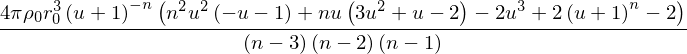

In [4]:
M = 4 * spy.pi * rho_0 * r_0 ** 3 * (u + 1) ** -n * (-(u + 1)*(n * u)**2 + \
                                                   2 * ((u + 1) ** n - u ** 3 - 1) + \
                                                   n * u * (3 * u ** 2 + u - 2)) \
    / ((n - 3) * (n - 2) * (n - 1))
M

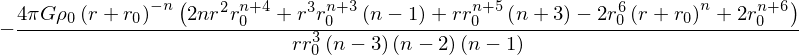

In [5]:
phi = - G * (M * r_0 / (u * r_0) ** 2).integrate(u)
# phi = (-G * M / r ** 2).subs(u, r / r_0).integrate(r)
phi = phi.factor().simplify()
phi_ = phi.subs(u, r / r_0).simplify()
phi_

In [6]:
left = ((phi_ * r).diff(r).diff(r) / r).simplify()
right = - 4 * spy.pi * G * rho

(left - right).simplify()

# Poisson equation

$$
    \nabla^2\phi(r) = -4\pi G\rho(r)
$$

$$
    \nabla^2\phi = \dfrac{1}{r}\dfrac{d^2}{dr^2}r\phi(r) = -4\pi G\rho(r)
$$

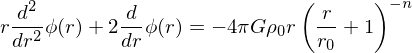

In [7]:
phi = spy.Function(r'\phi')(r)

left = (r * phi).diff().diff()

# dydt = y.diff(t)
expr = spy.Eq(left, -4 * spy.pi * G * rho * r)
# expr
# phi
expr

In [8]:
spy.dsolve(expr)

NotImplementedError: solve: Cannot solve 4*pi*G*\rho_0*r*(r/r_0 + 1)**(-n) + r*Derivative(\phi(r), (r, 2)) + 2*Derivative(\phi(r), r)